In [28]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

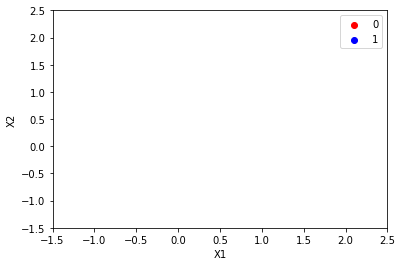

In [29]:
###################################################################################################################
#                                   ''' Import the iris dataset '''                                    
###################################################################################################################
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.15)

df = pd.DataFrame(X, columns=['X1', 'X2'])
df['Y'] = pd.Series(y)

Xdf, ydf = df.loc[:,['X1', 'X2']], df.loc[:,['Y']]
plt.scatter(Xdf[ydf==0]['X1'], Xdf[ydf==0]['X2'], label='0', color='red')
plt.scatter(Xdf[ydf==1]['X1'], Xdf[ydf==1]['X2'], label='1', color='blue')

# Prettify the graph
plt.legend()
plt.xlabel('X1')
plt.ylabel('X2')

# scale
plt.xticks([-1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 2.5])    # changing x1 scale by own
plt.yticks([-1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 2.5])    # changing x2 scale by own

# display
plt.show()

Text(0.5, 0, 'Y')

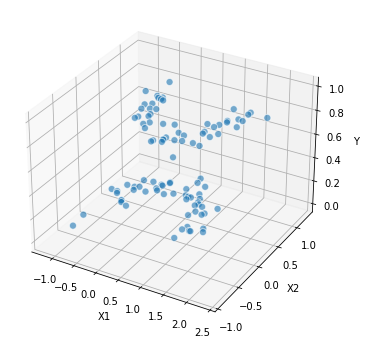

In [30]:

# Visualizing 3-D numeric data with Scatter Plots
# length, breadth and depth
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

xs = df['X1']
ys = df['X2']
zs = df['Y']
ax.scatter(xs, ys, zs, s=50, alpha=0.6, edgecolors='w')

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')

Text(0.5, 0, 'Y')

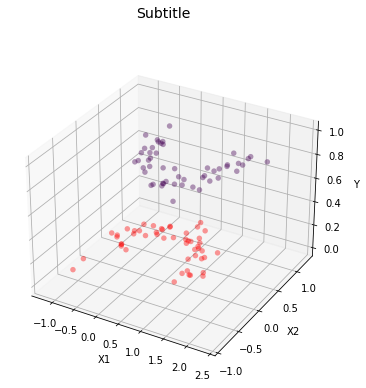

In [31]:
# Visualizing 4-D mix data using scatter plots
# leveraging the concepts of hue and depth
fig = plt.figure(figsize=(8, 6))
t = fig.suptitle('Subtitle', fontsize=14)
ax = fig.add_subplot(111, projection='3d')

xs = list(df['X1'])
ys = list(df['X2'])
zs = list(df['Y'])
data_points = [(x, y1, z) for x, y1, z in zip(xs, ys, zs)]
colors = ['red' if y1 == 0 else 1 for y1 in list(df['Y'])]

for data, color in zip(data_points, colors):
    x, y1, z = data
    ax.scatter(x, y1, z, alpha=0.4, c=color, edgecolors='none', s=30)

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')

In [32]:
###################################################################################################################
#                                     ''' Training a polynomial SVM '''                                        
###################################################################################################################
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import LinearSVC
import warnings
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings("ignore", category=ConvergenceWarning, module="sklearn")

polynomial_svm_clf = Pipeline([
        ("poly_features", PolynomialFeatures(degree=3)),
        ("scaler", StandardScaler()),
        ("svm_clf", LinearSVC(C=10, loss="hinge"))
    ])

polynomial_svm_clf.fit(X, y)

Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge'))])

In [33]:
obtained = polynomial_svm_clf.predict(X)
expected = y

(obtained == expected).sum()

97

In [34]:
###################################################################################################################
#                                   ''' Training a Polynomial Kernel SVM '''                                        
###################################################################################################################
from sklearn.svm import SVC

poly_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
    ])

poly_kernel_svm_clf.fit(X, y)


Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])

In [35]:
obtained = poly_kernel_svm_clf.predict(X)
expected = y

(obtained == expected).sum()

98

In [36]:
###################################################################################################################
#                                   ''' Training a Polynomial Kernel SVM '''                                        
###################################################################################################################
rbf_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))
    ])

rbf_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=0.001, gamma=5))])

In [37]:
obtained = rbf_kernel_svm_clf.predict(X)
expected = y

confusion_matrix(expected, obtained)

array([[49,  1],
       [ 1, 49]])

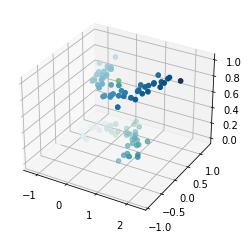

In [55]:
ax = plt.axes(projection='3d')
# ax.plot3D(X[:,0], X[:,1], obtained, 'gray')
ax.scatter3D(X[:,0], X[:,1], obtained, c=X[:,0], cmap='Greens');
ax.scatter3D(X[:,0], X[:,1], expected, c=X[:,0], cmap='Blues');

plt.show()

# (X[:,0], X[:,1], obtained)

In [ ]:
###################################################################################################################
#                                   ''' Training a Linear SVM Regressor '''                                        
###################################################################################################################
from sklearn.svm import LinearSVR

svm_reg = LinearSVR(epsilon=1.5)
svm_reg.fit(X, y)

In [ ]:
obtained = svm_reg.predict(X)
expected = y

confusion_matrix(expected, obtained)